<a href="https://colab.research.google.com/github/SaurabhAradwad/EDA-Capstone/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Airbnb Booking Analysis**

**Capstone Project EDA**

**Team - pro-infinity**

**Team Members - Ayush Sharma, Saurabh Aradwad, Rishika Rai, Aman Guleria**

**Problem statement**

>

Airbnb is a privately held website that connects homeowners with travelers looking for
 accommodations. With the help of few guidelines that allow hosts to compare their listings to
 others in the area to determine a fair price, Airbnb gives its hosts unlimited freedom
 to set the price for their units. On the other hand, guests who use Airbnb frequently 
experience lodging issues for a variety of reasons. Seasonal rushes, unforeseen 
cancellations of reservations, host preferences, etc. may all fall under this category.

Airbnb wants to know more about their customers and providers (hosts) so, What kind of measures can be taken to improve security, What can be their 

* Which are the busiest or least busy areas according to customers or hosts and why?
* What is our new marketing initiatives as well as the implementation of innovative additional services? 
*  What can we learn from different pricing in different areas?
*  What can be their further business decisions?

### Basic imports and csv mounting 

In [ ]:
# Importing all the required libraries for the analysis of given dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Connecting to GitHub repository 

!git clone https://github.com/SaurabhAradwad/EDA-Capstone.git

fatal: destination path 'EDA-Capstone' already exists and is not an empty directory.


In [ ]:
# importing csv file

airbnb = pd.read_csv("/content/EDA-Capstone/Airbnb NYC 2019.csv")
 

In [ ]:
airbnb

In [ ]:
# Computing Dataset length using length function 

len(airbnb)

48895

In [ ]:
# Checking All 16 columns 
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Analysing Columns Data with the help of transpose

airbnb.head().T

In [ ]:
# Checking For NULL values(Checking missing or Zero(0) or values which is not avaible)

airbnb.isnull().sum()

### No any requirement for treating  Null values 


In [ ]:
# Checking last rows with the help of tail method

airbnb.tail()

In [ ]:
# Detailed reviwe of entire data including all entries, null info, datatype 

airbnb.info()

### Which are the busiest or least busy areas according to customers or hosts and why?

In [ ]:
# Which are the busiest or least busy areas according to customers or hosts and why?

# Droping some of the columns for further analysis(selction of columns is done on the basis of areas and host info)

airbnb.drop(['id','name','latitude','longitude','number_of_reviews','last_review','reviews_per_month'], axis=1, inplace=True)
airbnb.head()

In [ ]:
# Examining the unique values of n_group as this column will appear very handy for later analysis

u_neighbourhood_group = airbnb.neighbourhood_group.unique()

print(u_neighbourhood_group)

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [ ]:
# Examining the unique values of neighbourhood as this column will appear very handy for later analysis

U_ne = airbnb.neighbourhood.unique()
print(U_ne)

In [ ]:
len(U_ne)

221

In [ ]:
# Selcting unique values for finding out busy areas with the help of neighbourhood_groups, 

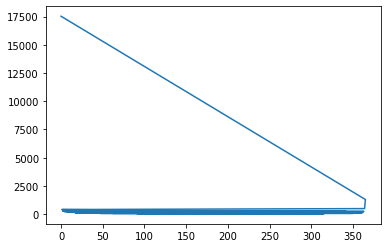

In [ ]:
#

pd.value_counts(airbnb['availability_365']).plot(kind="line");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


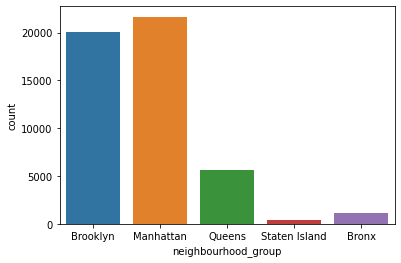

In [ ]:
# 

sns.countplot(airbnb.neighbourhood_group);

In [ ]:
# examining the unique values of room_type as this column will appear very handy for later analysis

airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


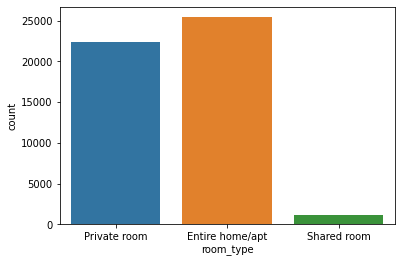

In [ ]:
# 

sns.countplot(airbnb.room_type);

In [ ]:
# What is our new marketing initiatives as well as the implementation of innovative additional services?


